In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs
import scipy

In [99]:
arrivals_file = "arrivals.csv"
arrivals = pd.read_csv(arrivals_file)

calldurations_file = "calldurations.csv"
calldurations = pd.read_csv(calldurations_file)

timespent_file = "timespent.csv"
timespent = pd.read_csv(timespent_file)

speeds_file = "speeds.csv"
speeds = pd.read_csv(speeds_file)

In [3]:
speeds_sample_size = speeds.shape[0]
print ("Sample size of speeds is {:d}".format(speeds_sample_size))

Sample size of speeds is 10000


In [4]:
n_bins = np.sqrt(speeds_sample_size)
print ("Number of bins should be {:.2f}".format(n_bins))

Number of bins should be 100.00


In [15]:
max(speeds.as_matrix())

/Users/peiruli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([109.737])

/Users/peiruli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


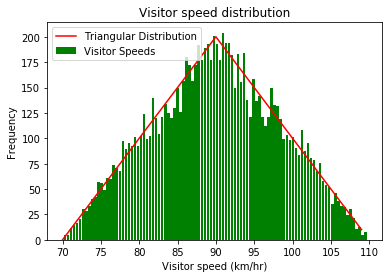

In [20]:
n_bins = 100
n, bins, patches = plt.hist(speeds.as_matrix(), n_bins, rwidth=0.8, label='Visitor Speeds', color='green')
x = range(70,110)
y = []
for i in range(70,90):
    y.append(10*i-10*70)
for i in range(91,111):
    y.append(10*111-10*i)
plt.plot(x,y,'red', label='Triangular Distribution')
plt.xlabel('Visitor speed (km/hr)')
plt.ylabel('Frequency')
plt.title('Visitor speed distribution')
plt.legend()
plt.show()

In [130]:
bins = [0.0] * (n_bins+1)
bins[int(n_bins/2)] = 90
for i in range(0,int(n_bins/2)):
    bins[i] = np.sqrt(2*i/n_bins)*20 + 70
    bins[n_bins - i] = (2 - np.sqrt(2*i/n_bins))*20 + 70

In [131]:
n1, bins1 = np.histogram(speeds.as_matrix(), bins=bins)

/Users/peiruli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [132]:
chisquare_on_speeds , p_value = scs.chisquare(n1)
print ("P-value of Chi-Square Goodness of Fit Test is {:.2f}".format(p_value))

P-value of Chi-Square Goodness of Fit Test is 0.13


In [57]:
timespent_sample_size = timespent.shape[0]
print ("Sample size of speeds is {:d}".format(timespent_sample_size))

Sample size of speeds is 10000


In [58]:
n_bins = np.sqrt(timespent_sample_size)
print ("Number of bins should be {:.2f}".format(n_bins))

Number of bins should be 100.00


In [106]:
max(calldurations.as_matrix())

/Users/peiruli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([1014.16])

In [116]:
call_durations = calldurations.as_matrix()
call_durations_data = np.array([0.0]*len(call_durations))
call_durations_data[0] = call_durations[0]

mean_call_durations = call_durations.mean()
lambda_exp = 1/mean_call_durations
lambda_exp

/Users/peiruli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.008396187776594857

/Users/peiruli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/peiruli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/peiruli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


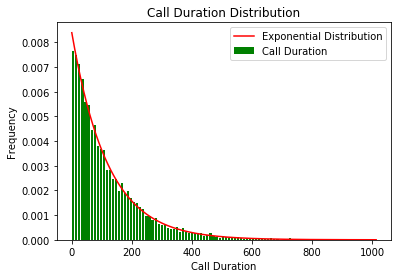

In [133]:
call_durations = calldurations.as_matrix()
call_durations_data = np.array([0.0]*len(call_durations))
call_durations_data[0] = call_durations[0]

mean_call_durations = call_durations.mean()
lambda_exp = 1/mean_call_durations

x = range(0,1014)
y = []
for i in x:
    y.append(lambda_exp*np.exp(-lambda_exp*i))
    
    
n, bins, patches = plt.hist(calldurations.as_matrix(), n_bins, rwidth=0.7, normed=True, label = 'Call Duration', color='green')
plt.plot(x,y,'red', label='Exponential Distribution')
plt.xlabel('Call Duration')
plt.ylabel('Frequency')
plt.title('Call Duration Distribution')
plt.legend()
plt.show()

In [124]:
bins = [0.0] * (n_bins+1)
bins[0] = 0
bins[-1] = 1014

for i in range(1,n_bins):
    bins[i] = (-mean_call_durations)*np.log(1-(i/n_bins))


n2, bins2 = np.histogram(call_durations, bins=bins)

In [127]:
chisquare_on_arrivals , p_value = scs.chisquare(n2)
print ("P-value of Chi-Square Goodness of Fit Test is {:.2f}".format(p_value))

P-value of Chi-Square Goodness of Fit Test is 0.19


/Users/peiruli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/peiruli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


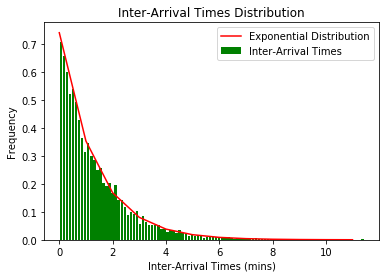

In [139]:
n_bins = 100
arrival_times = arrivals.iloc[:,1].as_matrix()
num = len(arrival_times)

inter_arrival_times = np.array([0.0]*num)
inter_arrival_times[0] = arrival_times[0]

for i in range(1,num):
    inter_arrival_times[i] = arrival_times[i] - arrival_times[i-1]

mean_inter_arrival = inter_arrival_times.mean()
lambda_exp = 1/mean_inter_arrival

x = range(0,12)
y = []
for i in x:
    y.append(lambda_exp*np.exp(-lambda_exp*i))

n, bins, patches = plt.hist(inter_arrival_times,n_bins, rwidth=0.8, normed=True, label='Inter-Arrival Times', color='green')
plt.plot(x,y,'red', label='Exponential Distribution')
plt.xlabel('Inter-Arrival Times (mins)')
plt.ylabel('Frequency')
plt.title('Inter-Arrival Times Distribution')
plt.legend()
plt.show()

In [142]:
bins = [0.0] * (n_bins+1)
bins[0] = 0
bins[-1] = 12

for i in range(1,n_bins):
    bins[i] = (-mean_inter_arrival)*np.log(1-(i/n_bins))


n2, bins2 = np.histogram(inter_arrival_times, bins=bins)

In [144]:
chisquare_on_arrivals , p_value = scs.chisquare(n2)
print ("P-value of Chi-Square Goodness of Fit Test is {:.5f}".format(p_value))
p_value

P-value of Chi-Square Goodness of Fit Test is 0.00000


7.522171767090726e-38